<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/A_Style_Based_Generator_Architecture_for_Generative_Adversarial_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Style-Based Generator Architecture for Generative Adversarial Networks**

논문 링크: https://arxiv.org/abs/1812.04948

최근 논문의 GAN을 보면 엄첨나게 큰 발전을 하였다. 하지만 여전히 generator가 image를 합성하는 과정은 block box로 여겨지며, 이로 인하여 합성되는 imae의 attribute(성별, 연령, 머리카락 등)을 조절하기 매우 힘들다. 뿐만아니라 논문에 리포트된 결과물과 달리 실제 합성된 image의 퀄리티가 불안정하다.

따라서 본 논문은 이러한 문제들을 해결하기 위하여 style transfer에 기반한 새로운 generator 구조를 제안한다. StyleGAN은 image를 style의 조합으로 보며, 각 layer마다 추가되는 style은 image의 coarse feature(EX. 성별, 포즈 등)로 부터 fine detail(EX. 머리색, 피부톤 등)까지 각기 다른 level의 visual attribute를 조절 할 수 있다.

## **StyleGAN 구조**

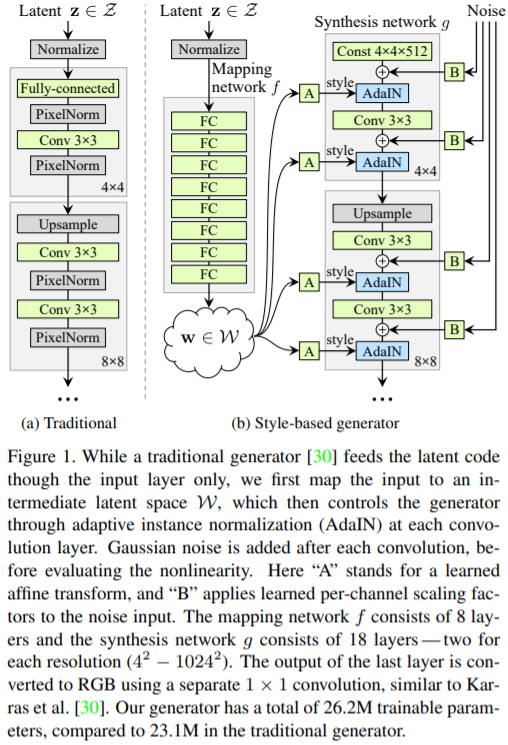

위의 그림 Figure 1에서 (a)는 기존 GAN들의 generator이고 (b)는 본 논문의 style-based generator이다. 기존 generator는 input latent vector z가 convolution, upsampling 과정을 거쳐 image로 변환이 되었다. 반면 **style-based generator의 경우는 latent vector z가 fc layer로 구성이 되어있는 mapping network를 거쳐 intermediate latent vector w로 변환이 된 후 synthesis network에 들어가서 최종적으로 image로 변환**이 된다.

### **Mapping Network**

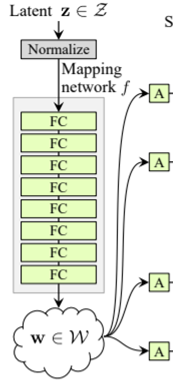

input vector z로부터 바로 image를 생성하는 것이 아닌 왜 mapping network를 거쳐 intermediate vector w로 변환을 하는 것일까?

기존의 방법과 같이 input에 단순히 latent vector z를 넣을 경우, 고정된 input distribution에 학습 image의 distribution을 맞춰야 한다는 한계점이 있다. 이로 인하여 visual attribute가 input space에 non-linear하게 mapping이 되기 때문에 이러한 visual attribute를 조절하기 매우 힘들어진다.

쉽게 설명하자면, 학습 image가 대부분 검은 머리를 가진 사람인 경우 input space의 대다수의 영역이 검은 머리를 표현하기 때문에 input vector를 조절하여 머리 색을 바꾸는 것이 힘들다는 것이다.

하지만 본 논문에서 제안한는 mapping network를 사용할 경우 고정된 distribution을 따르지 않기 때문에 훨씬 유동적인 공간에서 mapping을 할 수 있게 되고 즉, style을 mixing할 수 있게 되고 이러한 w를 이용해 visual attribute를 조절하기 훨씬 쉬워진다.

이러한 특징을 disentanglement라고 한다.

### **Disentanglement**

disentanglement의 뜻은 직역으로 해석하면 **'얽힌 것을 푸는 것'**이다. GAN에서 말하는 disentanglement는 위에서 언급했듯이 latent space가 linear한 구조를 가지고 있어서, z가 특정한 값을 바꾸면 생성되는 image의 하나의 특성만 영향을 주게 되면 disentanglement라고 한다.

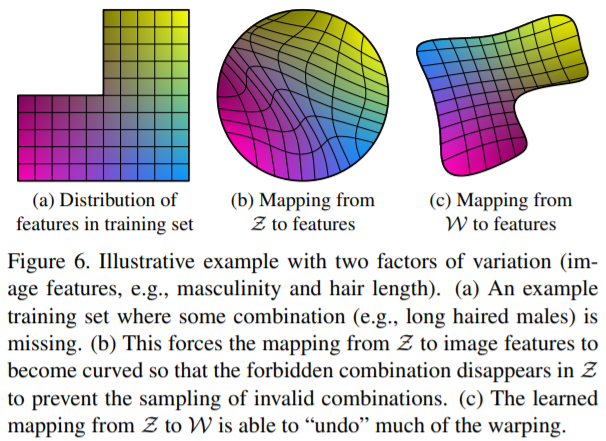

즉, mapping network를 통하여 위의 그림 Figure 6의 (c) 부분과 같이 w가 latent vector z처럼 고정된 분포를 따르지 않고, train 데이터 분포와 유사하게 w 자체 분포가 변형되게 학습이 된다. 본 논문에서는 이러한 disentanglement 정도를 학습할 수 있는 두 가지 평가 지표를 제안한다.

#### **Perceptual path length**

첫번째로 perceptual path length에 대해 알아보겠다. 이 지표의 가정은 만약 **latent space가 disentanglement하다면 z의 값이 아주 약간 변화하였을 때 큰 차이점이 없어야 한다**는 것이다. 반대로 **entanglement하다면 약간의 변화에도 다양한 차이점이 있어야 한다**. 이는 다양한 feature들이 얽혀있기 때문이라고 해석하면 된다.

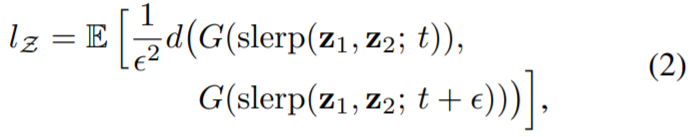

과정의 경우 pretrained VGG-16에 z_1과 z_2를 가지고 생성된 image를 넣어 embedding시킨다. 여기서 embedding된 feature들을 가지고 perceptual difference를 위의 식과 같이 구한다. (본 논문에선 조금 더 정확한 결과를 위하여 실제 측정시는 image의 얼굴 부분만 crop하여 사용했다.)

위의 식은 Z에서 **slerp(sphercial interpolation operation)**을 수행한다.

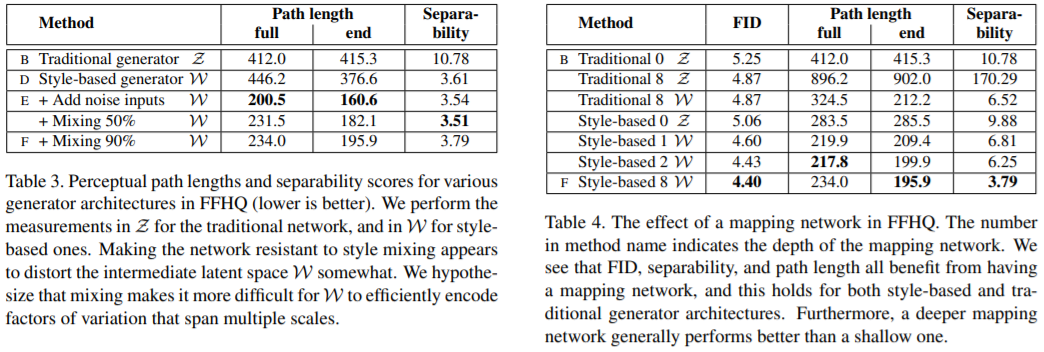

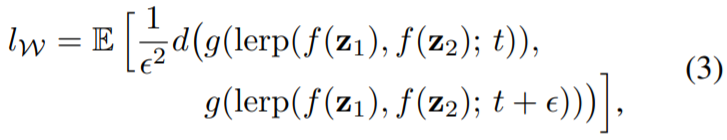

### **Synthesis Network**

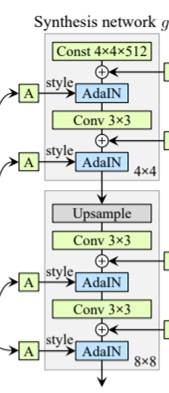

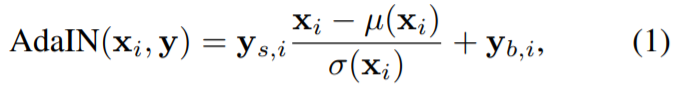

위에서 본 mapping network로부터 생성된 constant tensor를 synthesis network에 넣어 4 x 4 x 512 => 1024 x 1024 x 3의 image로 변환을 한다. 이때 중요한 점은 **각 convolution layer 이후마다 AdaIN을 통하여 style이 입혀지며, style vecotr y는 w로부터 affine transformation을 통하여 얻어진다**.

synthesis network의 매 layer마다 AdaIN을 통하여 style을 normalization 한 후 새로운 style을 입히기 때문에 특정 layer에서 입혀진 style은 바로 다음 convolution layer에 영향을 끼치게 된다. 즉, **각 layer의 style이 특정한 visual attribute만을 담당**하는 것이 용이하다. 이때 style을 조정한다는 의미는 곧 image의 global한 정보를 전부 조정한다는 것이기 때문에 항상 spatially-consistent한 image를 얻게 된다.

### **Stochastic Variation**

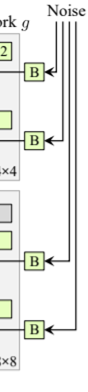

같은 사람에 대한 image여도 모공, 머리카락, 수염, 주름 등 **stochastic한 요소**들이 매우 많다. 이런 요소들은 image를 보다 더 real하게 만들어준다. 따라서 StyleGAN은 이를 위해 **synthesis network의 각 layer마다 random noise를 추가**했다. 이러한 stochastic한 정보를 추가하는 것은 단순 보다 더 real한 image로 만들어주는 것 뿐만아니라 input latent vector가 image의 중요한 정보에 더 집중할 수 있도록 도와준다.

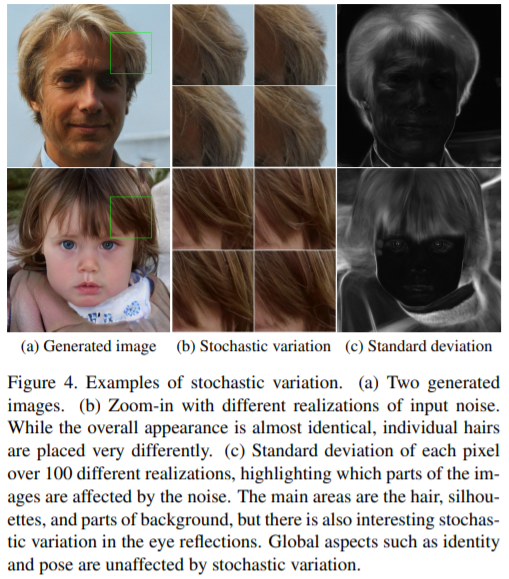

위의 그림 Figure 4의 (b)를 보면 noise값을 다르게 줄시 머리카락이 조금씩 바뀌는 것을 볼 수 있다. 그리고 (c) 부분의 경우 100장의 사진을 그대로 두고 noise값을 다르게 했을 때의 표준 편차 값이다.

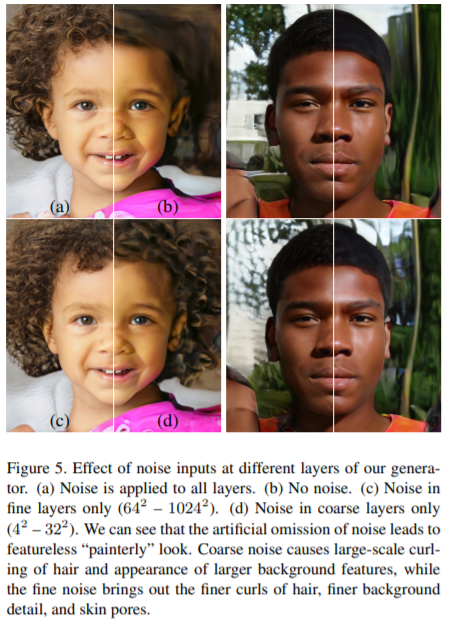

위의 그림 Figure 5 왼쪽 부분이 noise를 모든 layer에 준 경우고 오른쪽 부분이 noise를 주지 않는 경우이다.

### **Truncation trick in W**

학습 데이터의 분포를 고려하면, **density가 낮은 부분의 경우 train 후 표현이 잘 안된다**. 즉, generator가 제대로 train을 못하게 된다. 이러한 점을 방지하기 위해 쓰이는 것이 바로 truncation trick이다. 기존의 GAN model들은 이를 latent vector z에 바로 적용하였다.

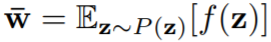

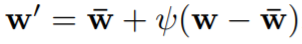

하지만 위의 내용을 봤으면 예상할 수 있듯이 본 논문에서는 mapping network의 output인 w의 space W에 적용하는 방법을 사용했다. 먼저 위의 식과 같이 w^-를 구하고 w'로 truncate를 해준다. (ψ는 1보다 항상 작은 값)

### **Style Mixing**

mapping network로부터 나온 intermediate vector w는 synthesis network의 모든 layer에 대해 style을 표현할 수 있게끔 학습이 되는데, 이는 곧 **여러 layer에 대한 style이 correlate되는 위험을 발생**시킬 수 있다.

본 논문은 이러한 문제를 해결하기 위하여 style mixing 기법을 제시하였다. StyleGAN 학습시 두 개의 input vector로부터 w_1과 w_2를 만들어낸다. 그리고 synthesis network의 초반에는 w_1로 학습하다가 특정 layer 이후부터는 w_2를 적용하여 학습한다. 이때 **style이 교체되는 layer를 매번 random하게 결정**해줌으로써 dropout과 비슷한 원리로 연속된 두 layer간의 style이 correlate되는 현상을 방지한다.

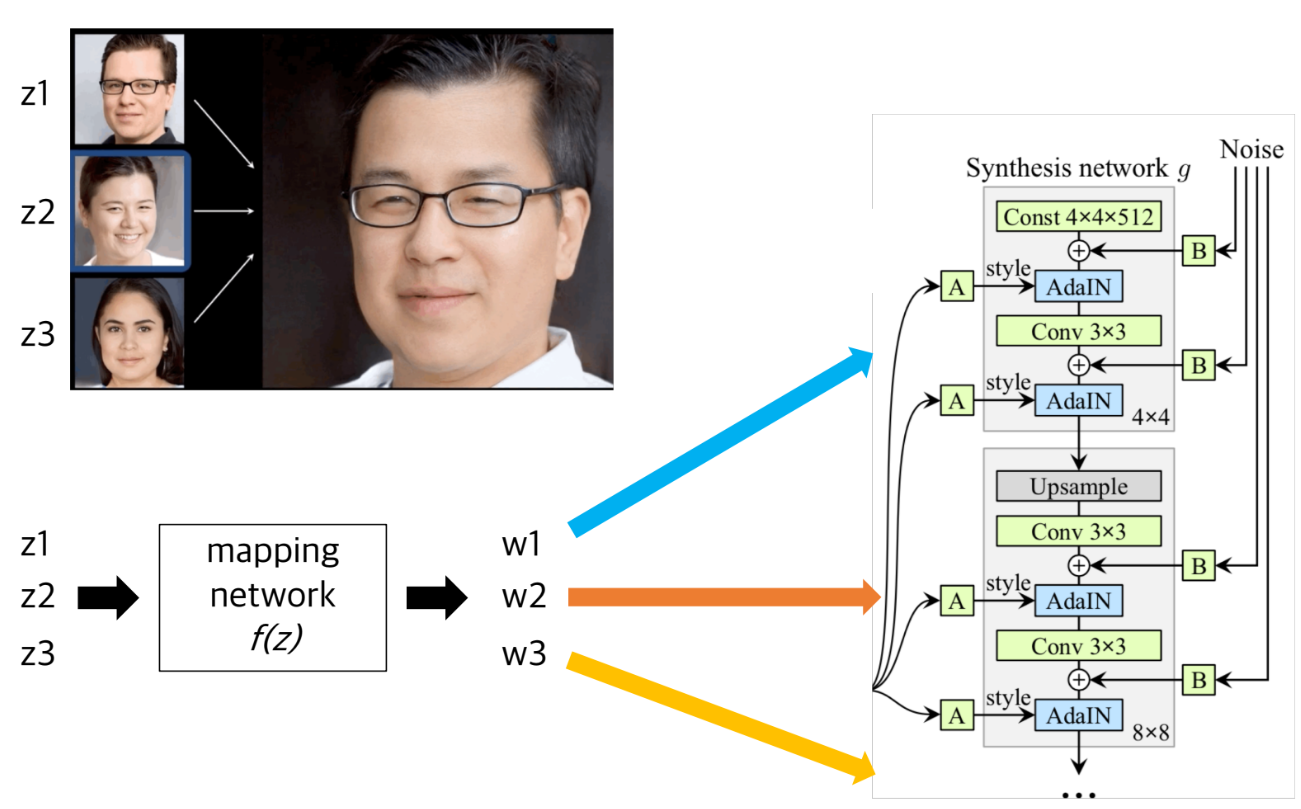

직관적으로 style을 mix하는 방법은 위와 같다. 전부 다른 z값을 가지고 w를 만든 후 해당하는 layer에 style을 입혀준다.

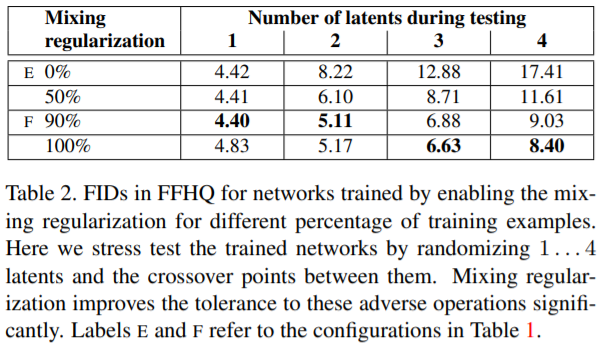

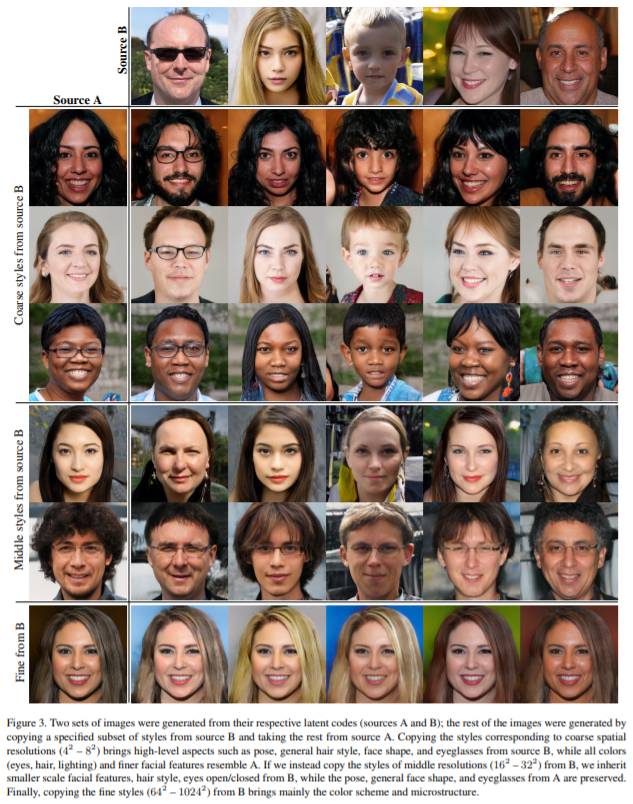

위의 표 Table 2를 보면 지표상으로 확실히 좋아졌으며 위의 그림 Figure 3을 보면 지표에 나온대로 각 layer가 담당하는 style이 뚜렷하게 구분되는 것을 알 수 있다.

## **Experiments**

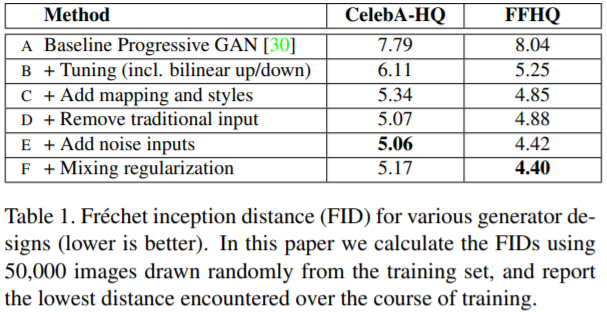

위의 표 Table 1는 GAN의 성능 지표중 하나인 FID(Frechet inception distance)를 사용했다. A는 PGGAN이며, B는 PGGAN에 추가적인 tech를 사용하여 성능을 높인 것이며, C는 mapping network와 AdaIN을 상요한 것이며, D는 기존 방식처럼 z를 넣은게 아닌 학습된 고정 tensor를 사용한 것이며, E는 noise input을 더한 것이며, F는 mixing regularization까지 더 한 것이다. dataset의 경우는 PGGAN에서 사용한 CelebA-HQ와 Nvidia에서 자체적으로 만든 FFHQ를 사용했다. (CelebA-HQ의 경우 WGAN-GP를 FFHQ의 경우 non-saturating loss with R1 regularization을 사용했다.)

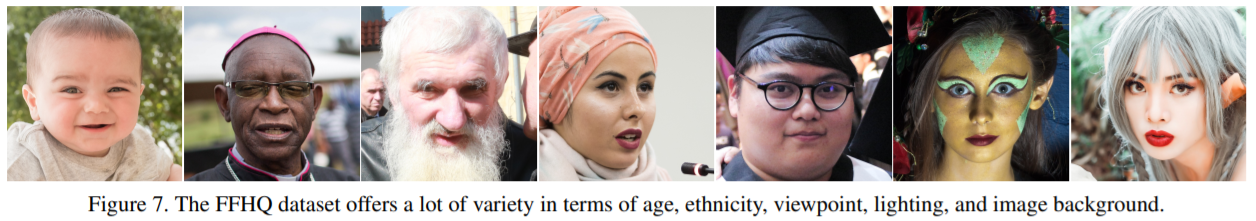

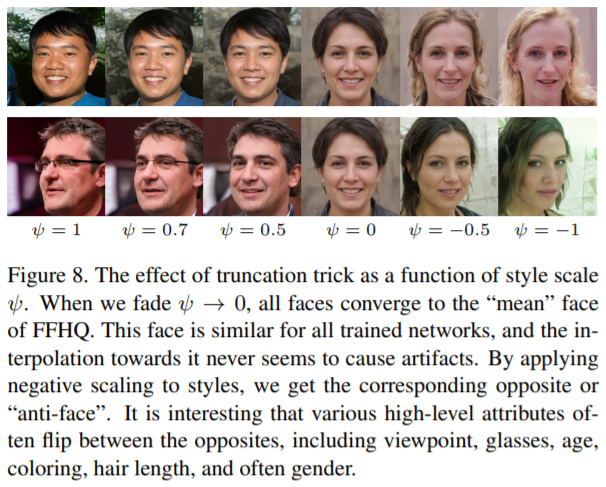

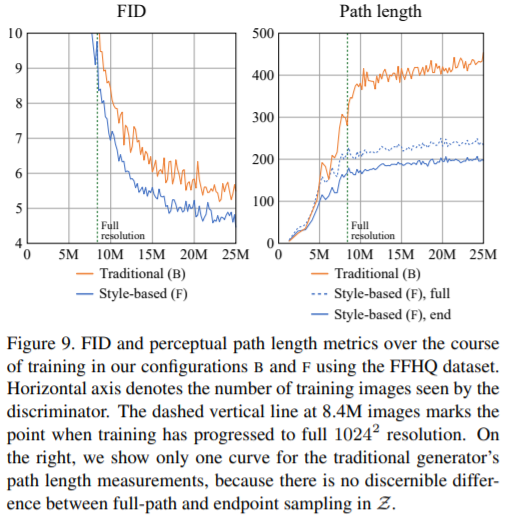

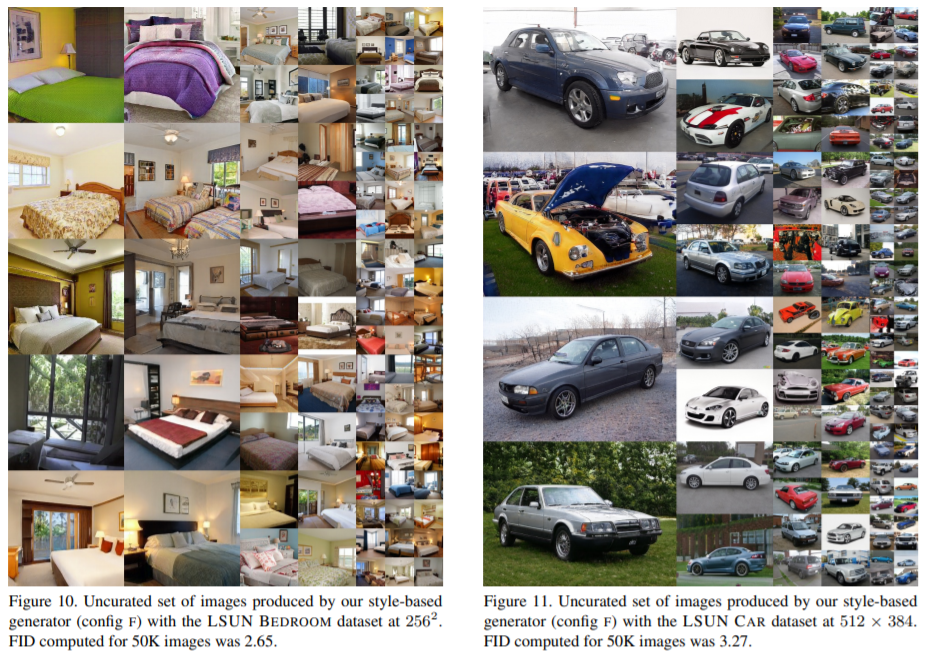